In [24]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [25]:
import cv2
from ultralytics import YOLO
#import numpy as np
import matplotlib.pyplot as plt

In [26]:
model = YOLO("best.pt")

In [45]:
# Path to your test image (change this to your own image path)
image_path = "sample car with license plate.jpg"

# Run detection
results = model(image_path, conf=0.25)  # confidence threshold 50%

# results[0] contains detections for the first (and only) image
results[0].show()   # OpenCV popup (if supported)


image 1/1 c:\Users\loren\OneDrive\Documents\GitHub\dspCPE4A2526\Activity#9\sample car with license plate.jpg: 480x800 1 2016, 112.2ms
Speed: 12.7ms preprocess, 112.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)


In [29]:
pip install  pytesseract

Note: you may need to restart the kernel to use updated packages.


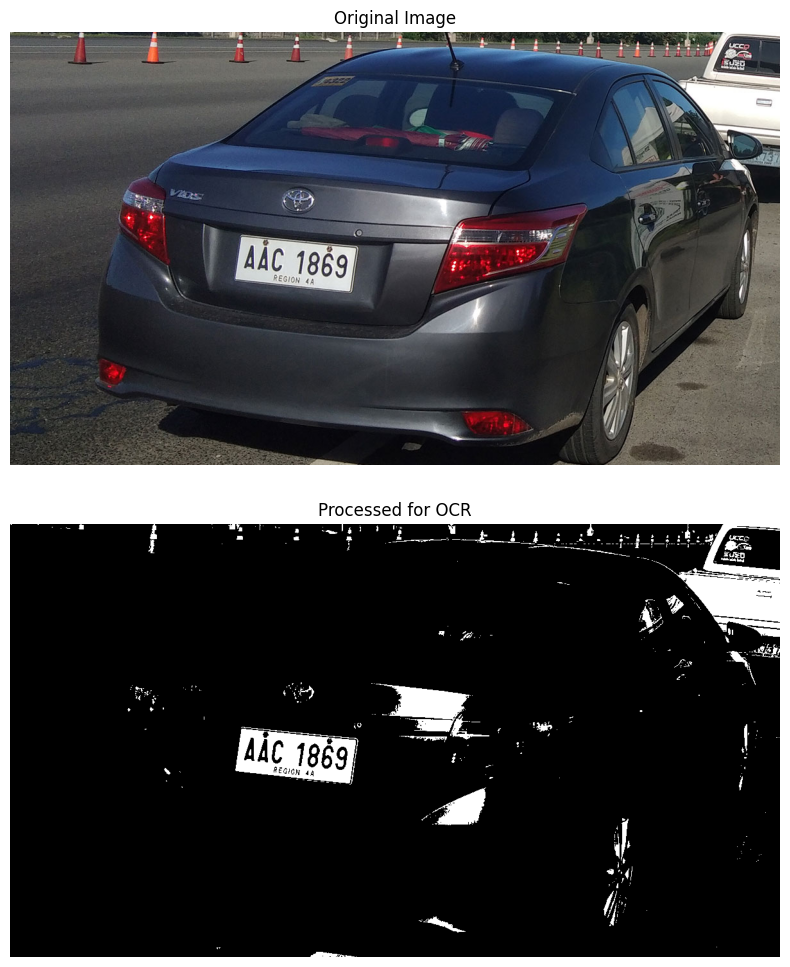

Extracted Text:
 


In [35]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# --- OPTIONAL: If tesseract is not in PATH, set the path manually ---
# For Windows, uncomment and adjust:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def ocr_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale and apply thresholding
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # OCR with Tesseract
    text = pytesseract.image_to_string(thresh)

    # Show original and processed image inline (stacked vertically)
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(thresh, cmap="gray")
    axs[1].set_title("Processed for OCR")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

    return text


# Example usage
text_output = ocr_image("sample car with license plate.jpg")
print("Extracted Text:\n", text_output)



image 1/1 c:\Users\loren\OneDrive\Documents\GitHub\dspCPE4A2526\Activity#9\sample car with license plate.jpg: 480x800 1 2016, 69.3ms
Speed: 4.2ms preprocess, 69.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)


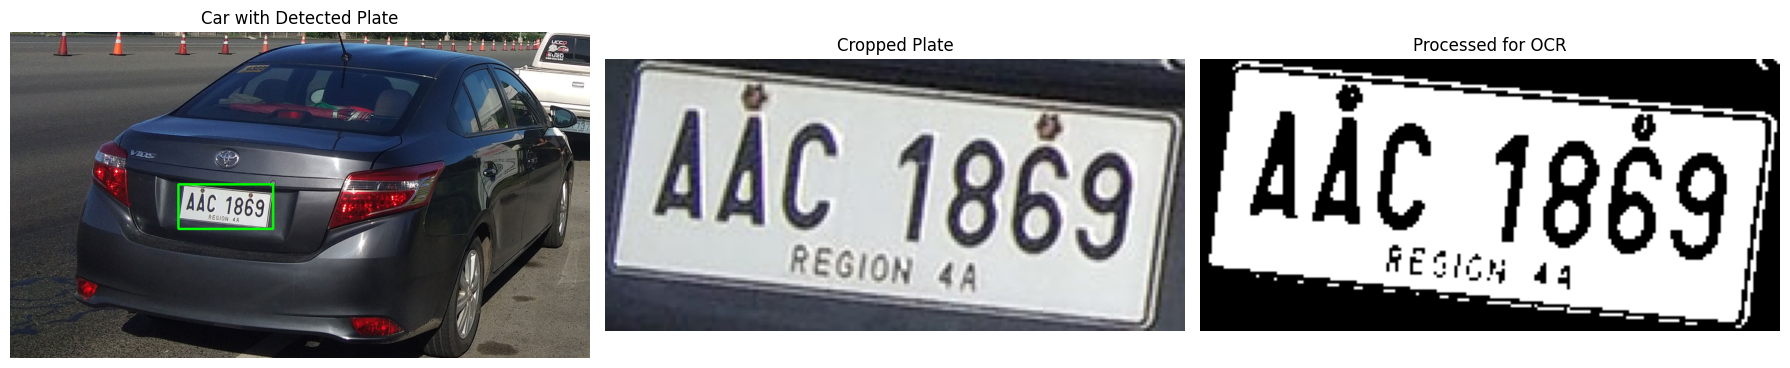

Extracted Plate Number: HAAC1869


In [44]:
import cv2
from ultralytics import YOLO
import pytesseract
from matplotlib import pyplot as plt

# --- Tesseract configuration ---
# For Windows, uncomment and adjust:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load YOLO model
model = YOLO("best.pt")

def detect_and_crop_plate(image_path):
    results = model(image_path, conf=0.25)
    result = results[0]
    
    if len(result.boxes) == 0:
        print("No license plate detected!")
        return None, None, None
    
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    boxes = result.boxes.xyxy.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()
    
    best_idx = confidences.argmax()
    x1, y1, x2, y2 = boxes[best_idx].astype(int)
    
    plate_crop = img[y1:y2, x1:x2]
    
    annotated_img = img_rgb.copy()
    cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 3)
    
    return plate_crop, annotated_img

def preprocess_plate_image(plate_img):
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def process_vehicle_plate(image_path):
    plate_crop, annotated_img = detect_and_crop_plate(image_path)
    if plate_crop is None:
        return
    
    processed_plate = preprocess_plate_image(plate_crop)
    
    # Display side by side: Original w/ box, Cropped, Processed
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    axs[0].imshow(annotated_img)
    axs[0].set_title("Car with Detected Plate")
    axs[0].axis("off")
    
    axs[1].imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Cropped Plate")
    axs[1].axis("off")
    
    axs[2].imshow(processed_plate, cmap="gray")
    axs[2].set_title("Processed for OCR")
    axs[2].axis("off")
    
    plt.tight_layout()
    plt.show()
    
    # OCR text
    config = '--psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(processed_plate, config=config)
    print("Extracted Plate Number:", ''.join(e for e in text if e.isalnum()))

if __name__ == "__main__":
    image_path = "sample car with license plate.jpg"
    process_vehicle_plate(image_path)
